In [2]:
require(dplyr)
require(xlsx)
require(lubridate)
require(tidyr)
require(xts)
require(forecast)
require(ggplot2)

Loading required package: dplyr

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: xlsx
Loading required package: rJava
Loading required package: xlsxjars
Loading required package: lubridate

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date

Loading required package: tidyr
Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Attaching package: 'xts'

The following objects are masked from 'package:dplyr':

    first, last

Loading required package: forecast
Loading required package: timeDate
This is forecast 7.1 

Loading required package: ggplot2


In [3]:
data = tbl_df(read.xlsx("c:/users/pepar/downloads/champagne-sales.xlsx", sheetName="Sales"))

In [4]:
summary(data)

     Month    Champagne_Sales
 1-01   : 1   Min.   : 1573  
 1-02   : 1   1st Qu.: 3075  
 1-03   : 1   Median : 4084  
 1-04   : 1   Mean   : 4802  
 1-05   : 1   3rd Qu.: 5221  
 1-06   : 1   Max.   :13916  
 (Other):90                  

In [5]:
source("test_train_split.r")
source("best_alpha.r")
data_man = data %>% mutate(Month=ymd(paste("200",Month,"-01",sep=""))) %>% 
    arrange(Month)

In [8]:
dfresults=data.frame()
for (nperiods in seq(1,30,by=1)){
    data_test_train=test_train_slice(data_man,n=nperiods)
    data_test = tbl_df(data_test_train$data_test)
    data_train =tbl_df(data_test_train$data_train)
    data_train_sp = data_train %>% mutate(Year=year(Month),Month=month(Month,label=TRUE)) %>% spread(Month,Champagne_Sales)
    data_ts_alt <- ts(data_train,start=c(2001,1),end=c(year(data_train$Month[as.numeric(count(data_train))]),month(data_train$Month[as.numeric(count(data_train))])),frequency=12)
    fit1 <- stl(data_ts_alt[,2],  s.window="periodic")
    #plot(fit1)
    #print(data_ts_alt[,2])
    #print(data_train)
    #print(data_test)
    #alpha=fcn_best_alpha(data_ts_alt,forecast_n=nperiods)
    ets <- ets(data_ts_alt[,2],model="ZZZ")
    fit21<-forecast(ets,h=nperiods,method="ets",robust=TRUE)
    # simple exponential - models level
    #fit11 <- HoltWinters(data_ts_alt[,2], beta=FALSE, gamma=FALSE)
    # double exponential - models level and trend
    #fit12 <- HoltWinters(data_ts_alt[,2], gamma=FALSE)
    # triple exponential - models level, trend, and seasonal components
    #fit13 <- HoltWinters(data_ts_alt[,2], beta=FALSE, alpha=0.54)

    #accuracy(forecast(fit11,6),data_test$Champagne_Sales)
    #accuracy(forecast(fit12,6),data_test$Champagne_Sales)
    #accuracy(forecast(fit13,6),data_test$Champagne_Sales)
    #forecast(fit13,6)
    #fit21 <- auto.arima(data_ts_alt[,2])
    #forecast(fit21,6)
    #accuracy(forecast(fit21,6),data_test$Champagne_Sales)
    dfresults=rbind(dfresults,data.frame(nperiods=nperiods,RSME_TEST=accuracy(forecast(fit21,nperiods),data_test$Champagne_Sales)[2,2],
                                        RSME_TRAIN=accuracy(forecast(fit21,nperiods),data_test$Champagne_Sales)[1,2],
                                        MAE_TEST=accuracy(forecast(fit21,nperiods),data_test$Champagne_Sales)[2,3],
                                        MAE_TRAIN=accuracy(forecast(fit21,nperiods),data_test$Champagne_Sales)[1,3],
                                        TYPE="ETS"))
    arima <- auto.arima(data_ts_alt[,2])
    fit21<-forecast(arima,h=nperiods,robust=TRUE)
    # simple exponential - models level
    #fit11 <- HoltWinters(data_ts_alt[,2], beta=FALSE, gamma=FALSE)
    # double exponential - models level and trend
    #fit12 <- HoltWinters(data_ts_alt[,2], gamma=FALSE)
    # triple exponential - models level, trend, and seasonal components
    #fit13 <- HoltWinters(data_ts_alt[,2], beta=FALSE, alpha=0.54)

    #accuracy(forecast(fit11,6),data_test$Champagne_Sales)
    #accuracy(forecast(fit12,6),data_test$Champagne_Sales)
    #accuracy(forecast(fit13,6),data_test$Champagne_Sales)
    #forecast(fit13,6)
    #fit21 <- auto.arima(data_ts_alt[,2])
    #forecast(fit21,6)
    #accuracy(forecast(fit21,6),data_test$Champagne_Sales)
    dfresults=rbind(dfresults,data.frame(nperiods=nperiods,RSME_TEST=accuracy(forecast(fit21,nperiods),data_test$Champagne_Sales)[2,2],
                                        RSME_TRAIN=accuracy(forecast(fit21,nperiods),data_test$Champagne_Sales)[1,2],
                                        MAE_TEST=accuracy(forecast(fit21,nperiods),data_test$Champagne_Sales)[2,3],
                                        MAE_TRAIN=accuracy(forecast(fit21,nperiods),data_test$Champagne_Sales)[1,3],
                                        TYPE="ARIMA"))
    #print(autoplot(est.forecast))
    #autoplot(forecast(fit13,6))
    #print(autoplot(forecast(fit21,nperiods)))
    #print(ggplot(data_man,aes(Month,Champagne_Sales))+geom_line())
}

Warning message in forecast.Arima(arima, h = nperiods, robust = TRUE):
"The non-existent robust arguments will be ignored."Warning message in forecast.Arima(arima, h = nperiods, robust = TRUE):
"The non-existent robust arguments will be ignored."Warning message in forecast.Arima(arima, h = nperiods, robust = TRUE):
"The non-existent robust arguments will be ignored."Warning message in forecast.Arima(arima, h = nperiods, robust = TRUE):
"The non-existent robust arguments will be ignored."Warning message in forecast.Arima(arima, h = nperiods, robust = TRUE):
"The non-existent robust arguments will be ignored."Warning message in forecast.Arima(arima, h = nperiods, robust = TRUE):
"The non-existent robust arguments will be ignored."Warning message in forecast.Arima(arima, h = nperiods, robust = TRUE):
"The non-existent robust arguments will be ignored."Warning message in forecast.Arima(arima, h = nperiods, robust = TRUE):
"The non-existent robust arguments will be ignored."Warning message 

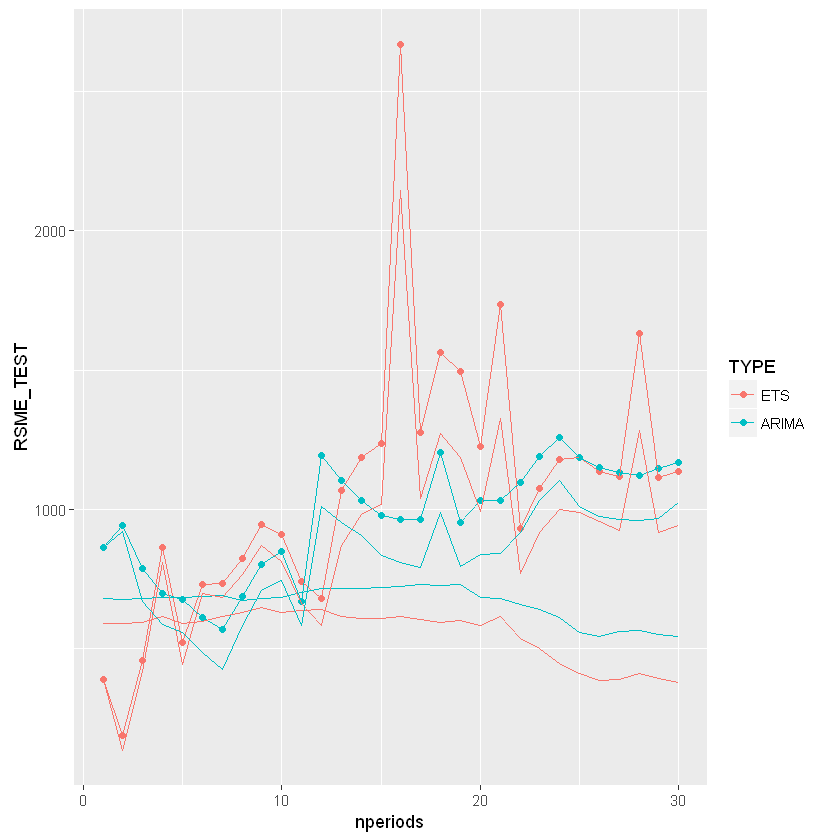

In [9]:
print(ggplot(dfresults,aes(nperiods,RSME_TEST, color=TYPE))+geom_point()+geom_path()+geom_path(aes(nperiods,RSME_TRAIN))+geom_path(aes(nperiods,MAE_TEST)))

In [11]:
dfresults

,nperiods,RSME_TEST,RSME_TRAIN,MAE_TEST,MAE_TRAIN
1,1.0000,389.5629,589.1239,389.5629,427.6339
2,2.0000,187.3922,589.9990,135.4591,433.7427
3,3.0000,459.5145,594.7560,417.8704,427.1184
4,4.0000,861.9699,615.7876,810.6154,439.2048
5,5.0000,522.1587,591.6338,442.4377,431.1416
6,6.0000,730.2028,598.0971,696.6443,433.4296
7,7.0000,732.7411,616.5083,685.7240,439.9967
8,8.0000,824.5956,630.1687,766.1246,456.5522
9,9.0000,944.7585,647.6755,869.1388,460.2485
10,10.0000,908.5017,630.9258,811.8613,452.9895
